Image shape: (467, 700, 3)


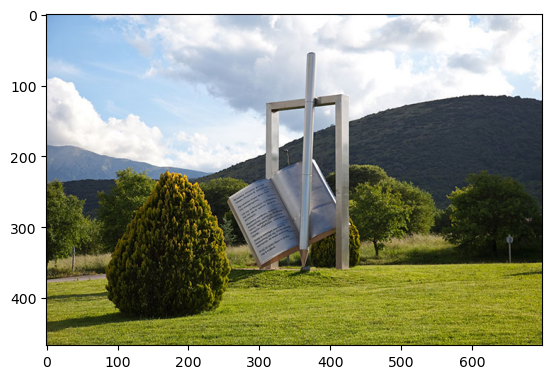

In [14]:
# ALEXANDROS MILONAKIS AM:3045

import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/uoi_entrance.jpg') # Read an image 
print("Image shape:", img.shape)           # Print image size and color depth. The shape should be (H,W,C).

plt.imshow(img)                            # Show the original image
plt.show()

In [15]:
import copy
import time
def iterative(img):
    """ Iterative operation. """
    image = copy.deepcopy(img)              # Create a copy of the image matrix
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            #Top Right
            if y < image.shape[0]/2 and x > image.shape[1]/2:
                image[y,x] = image[y,x] * np.array([0,1,0])    # Keep the green channel
            #Bottom Left
            elif y > image.shape[0]/2 and x < image.shape[1]/2:
                image[y,x] = [image[y,x][2], image[y,x][1], image[y,x][0]]  #(B,G,R) image
            #Bottom Right
            elif y > image.shape[0]/2 and x > image.shape[1]/2:
                r,g,b = image[y,x]
                image[y,x] = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return image

def get_channel(img, channel):
    """ Function to extract 2D image corresponding to a channel index from a color image. 
    This function should return a H*W array which is the corresponding channel of the input image. """
    image = copy.deepcopy(img)     # Create a copy so as to not change the original image
    #Red
    if channel == 0:
        return image[:,:,0]
    #Green
    elif channel == 1:
        return image[:,:,1]
    #Βlue
    elif channel == 2:
        return image[:,:,2]
    else:
        raise ValueError("Invalid index. Valid values are 0, 1, or 2.")


    
def merge_channels(img0, img1, img2):
    """ Function to merge three single channel images to form a color image. 
    This function should return a H*W*3 array which merges all three single channel images 
    (i.e. img0, img1, img2) in the input."""
    # here i use np stack to take the 2d images and stack them along the last dimension to
    #get back an image
    channels = [img0, img1, img2]
    return np.stack(channels, axis=2)
    
    
def vectorized(img):
    """ Vectorized operation. """
    image = copy.deepcopy(img)
    a = int(image.shape[0]/2)
    b = int(image.shape[1]/2)
    # Please also keep the red / green / blue channel respectively in the corresponding part of image
    # with the vectorized operations. You need to make sure your final generated image in this
    # vectorized() function is the same as the one generated from iterative().
    red_ch = get_channel(image, 0)
    green_ch = get_channel(image, 1)
    blue_ch = get_channel(image, 2)
    #Top Right: keep the green channel.What I do here is create an image same shape as the first one
    #and then I fill the green channel and we get back a green version of the starting image which I
    #  cut and put in the top right of the starting image
    green_img = np.zeros_like(image)
    green_img[:,:,1] = green_ch
    image[0:a,b:image.shape[1]] = green_img[0:a,b:image.shape[1]]
    
    #Bottom Left: (B,G,R) image
    #Here I use the merge function i created and the channels i get from get channel give them as input 
    #  in a different order and i get BGR image which i use in the bottom left corner
    bgr_img = merge_channels(blue_ch,green_ch,red_ch)
    image[a:image.shape[0],0:b] =   bgr_img[a:image.shape[0],0:b]
     
    #Bottom Right: Grayscale image
    #Here I use a vector with the variables found in iterative method and then using np.dot to multiply 
    #  the matrix and the vector to get back the greyscale image which i cut and put in the bottom right
    #  corner
    x= np.array([0.2989, 0.5870, 0.1140])
    gray_img_3d= merge_channels(np.dot(image,x),np.dot(image,x),np.dot(image,x))
    image[a:image.shape[0],b:image.shape[1]] = gray_img_3d[a:image.shape[0],b:image.shape[1]]
    
    return image

Iterative operation (sec): 1.0807931423187256
Vectorized operation (sec): 0.0485532283782959


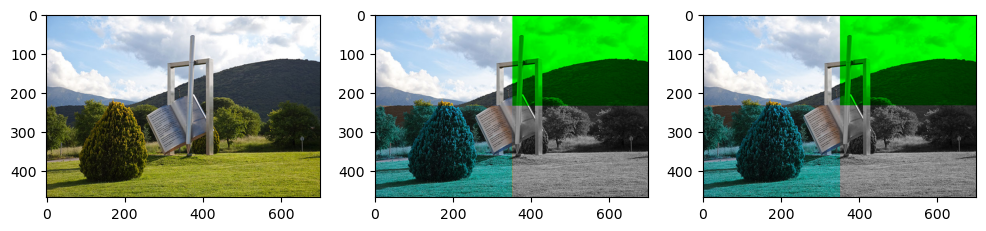

In [16]:
import time

def compare():
    img = plt.imread('images/uoi_entrance.jpg') 
    cur_time = time.time()
    image_iterative = iterative(img)
    print("Iterative operation (sec):", time.time() - cur_time)
    
    cur_time = time.time()
    image_vectorized = vectorized(img)
    print("Vectorized operation (sec):", time.time() - cur_time)
    
    return image_iterative, image_vectorized

# Test your implemented get_channel()
assert len(get_channel(img, 0).shape) == 2  # Index 0

# Run the function
image_iterative, image_vectorized = compare()

# Plotting the results in sepearate subplots.
plt.figure(figsize=(12,4))   # Adjust the figure size.
plt.subplot(1, 3, 1)         # Create 1x3 subplots, indexing from 1
plt.imshow(img)              # Original image.

plt.subplot(1, 3, 2)       
plt.imshow(image_iterative)  # Iterative operations on the image.

plt.subplot(1, 3, 3)
plt.imshow(image_vectorized) # Vectorized operations on the image.

plt.show()                   # Show the figure.

# Note: The shown figures of image_iterative and image_vectorized should be identical!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

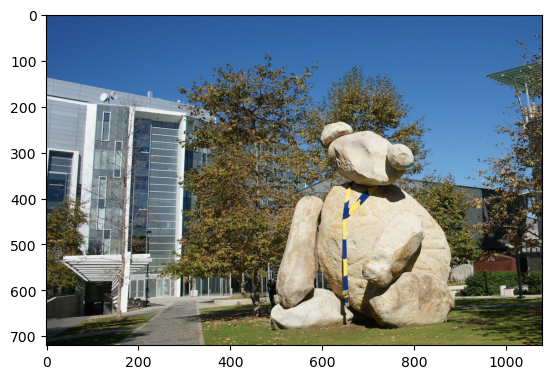

In [17]:
# (1) Read the image.
#### Write your code here. ####
img_path = 'images/bear.png'
img = plt.imread(img_path)


plt.imshow(img) # Show the image after reading.
plt.show()

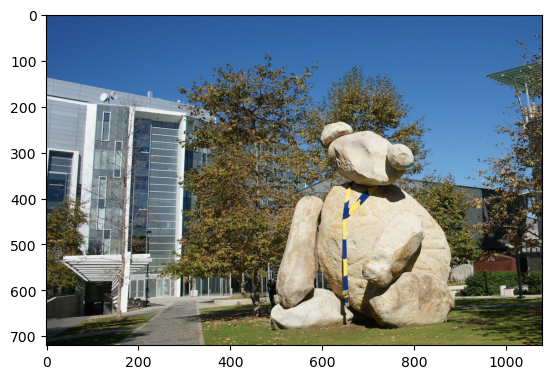

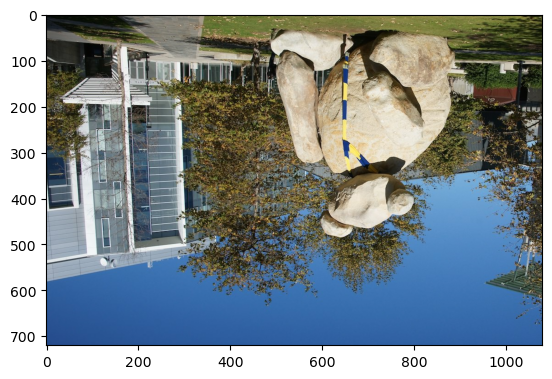

In [47]:
# (2) Flip the image from top to bottom.
import copy
def flip_img(img):
    """ Function to mirror image from top to bottom. 
    This function should return a H*W*3 array which is the flipped version of original image.
    """   
    #Here  i use [::-1] to reverse the elements in the vertical axis of the array
    flipped_img = img[::-1]
    return flipped_img

plt.imshow(img)
plt.show()
flipped_img = flip_img(img)
plt.imshow(flipped_img)
plt.show()

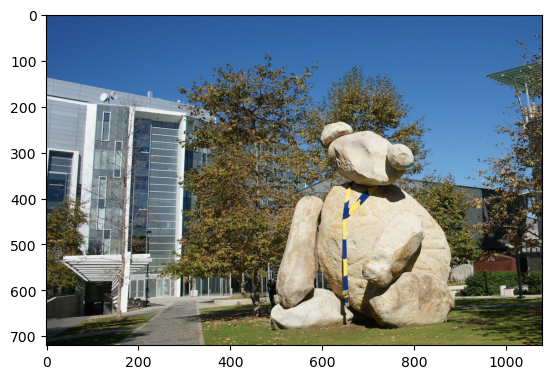

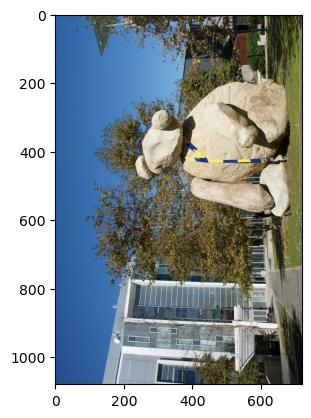

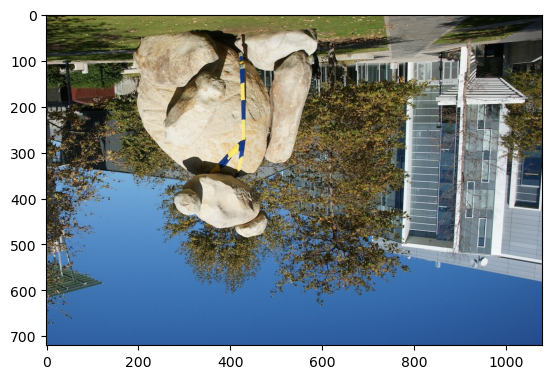

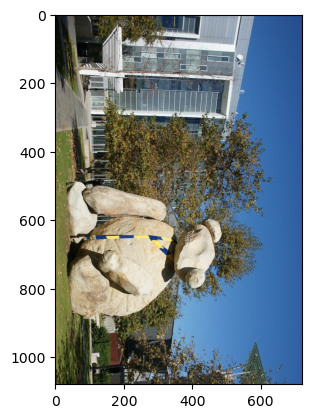

In [52]:
# (3) Rotate image.
def rotate_90(img):
    """ Function to rotate image 90 degrees counter-clockwise. 
    This function should return a W*H*3 array which is the rotated version of original image. """
    #### Write your code here. ####
    #Here I use np.transponse to permute the dimension of the array(first and second dimension)
    rotated_img = np.transpose(img, (1, 0, 2)) 
    #And then we use flip to arrange our image correctly
    rotated_img = flip_img(rotated_img) 
    return rotated_img

plt.imshow(img)
plt.show()
rot90_img = rotate_90(img)
plt.imshow(rot90_img)
plt.show()
rot180_img = rotate_90(rotate_90(img))
plt.imshow(rot180_img)
plt.show()
rot270_img = rotate_90(rotate_90(rotate_90(img)))
plt.imshow(rot270_img)
plt.show()

Face Mask Image Size: 
(162, 240, 3)
Face Mask Binary Mask Image Size: 
(162, 240, 3)


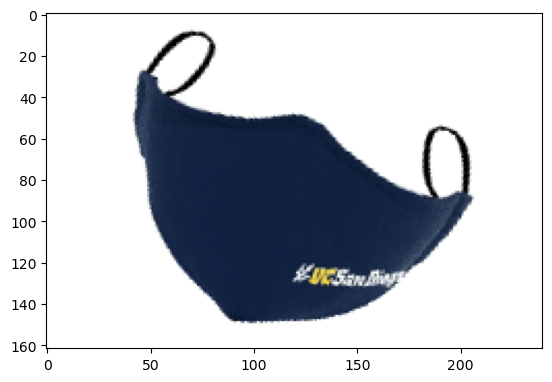

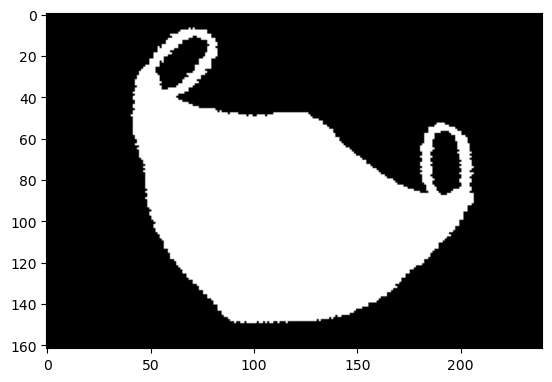

In [30]:
# (4)Read the face mask image and the face mask binary image
import matplotlib.pyplot as plt
#### Write your code here. ####
mask_img_path = 'images/face-mask.png'
mask_img = plt.imread(mask_img_path) 
bi_mask_img_path = 'images/face-mask-binary.png'
bi_mask_img = plt.imread(bi_mask_img_path) 


print("Face Mask Image Size: ")
print(mask_img.shape)
print("Face Mask Binary Mask Image Size: ")
print(bi_mask_img.shape)

plt.imshow(mask_img)
plt.show()
plt.imshow(bi_mask_img)
plt.show()

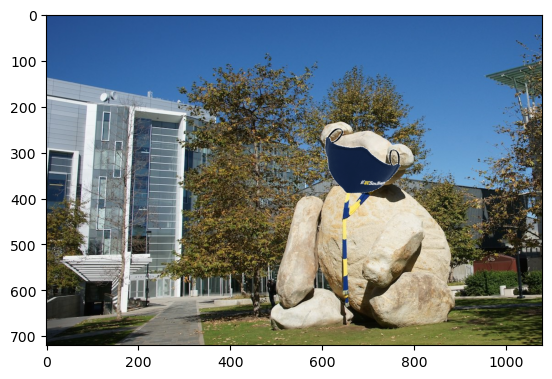

In [44]:
# (5) Put the face mask on the bear's face
#Here in order to put the mask on the bears face we do a loop in order to traverse through the array
#  and we use the if statements to avoid some IndexOutOfBounds errors and then wherever we get 1
#  from the binary mask image we fill in the bear image the original mask image
import copy
start_x = 565
start_y = 240

maskon_img = copy.deepcopy(img)
for y in range(maskon_img.shape[0]):
    for x in range(maskon_img.shape[1]):
        if y-start_y < 0 or y-start_y >= bi_mask_img.shape[0]:
            continue
        if x-start_x < 0 or x-start_x >= bi_mask_img.shape[1]:
            continue
        for c in range(3):
            if bi_mask_img[y-start_y][x-start_x][c] == 1:
                maskon_img[y][x][c] = mask_img[y-start_y][x-start_x][c]

plt.imshow(maskon_img)

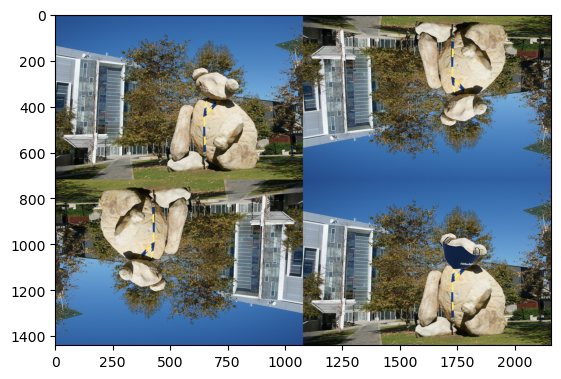

In [51]:
# (6) Write your code here to tile the four images and make a single image. 
# You can use the img, flipped_img, rot180_img, maskon_img to represent the four images.
# After tiling, please display the tiled image.
#### Write your code here. ####
#Finaly we create a tilled image array using the specs of the image with size double
# that of the original image and then we add 1 by 1 the images first top left and
# clockwise the rest
H = img.shape[0]
W = img.shape[1]
tilled_img = np.zeros((2*H, 2*W, 3), dtype=np.float64)
tilled_img[:H, :W] = img
tilled_img[:H, W:] = flipped_img
tilled_img[H:, :W] = rot180_img
tilled_img[H:, W:] = maskon_img
plt.imshow(tilled_img)